# Introduction

**Name:** Syarief Qayum Suaib

**Batch:** FTDS 043

## Objectives

The objective of this project is to build and evaluate Artificial Neural Network (ANN) models, specifically Convolutional Neural Networks (CNNs) on Computer Vision for Clean/Dirty Road Image Classification by preparing the dataset, creating baseline models and improved model using transfer learning and finally analyzing their performance, and selecting the best model for the inference and deployment at HuggingFace using streamlit.

## Problem Statement

The problem addressed in this project is how the model can automatically classifiy road images based on their cleanliness state (Clean or Dirty).

Dirty roads cause environmental pollution, health risks, infrastructure damage, and safety hazards.

Imagine if we do manual inspection and categorizing road segments based on cleanliness can be inefficient, subjective and for sure time consuming. Creating an automation system that can identify dirty areas is crucial for effective management, prioritizing cleaning efforts, and optimizing resource allocation for city governments and cleaning services( private institutions).

*   **Justification:** Monitoring road cleanliness is crucial for infrastructure maintenance planning, assessing environmental impact and optimizing street cleaning schedules. Automated classification enhances also resource allocation, provides clarity in terms of data for urban planner, and supports environmental monitoring.

*   **Targeted User:** City government maintenance departments, cleaning services companies, urban planners.

## Dataset Overview

*   **Source:** Kaggle - Clean/Dirty Road Classification Dataset
*   **Link:** `https://www.kaggle.com/datasets/faizalkarim/cleandirty-road-classification/data`
*   **Topic:** Computer Vision Classification Task
*   **Number of Classes:** 2 classes ('Clean', 'Dirty').


# Import Libraries

This section imports libraries for model loading, image preprocessing, and inference.

In [21]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
import os
import pickle
from PIL import Image
import matplotlib.pyplot as plt

# Specific imports for image preprocessing
from tensorflow.keras.utils import load_img, img_to_array

print("Libraries imported successfully.")

Libraries imported successfully.


In [22]:
import warnings

# Define the specific warning message you want to ignore
warning_message = "Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables."

# Filter out the specific UserWarning with the matching message
warnings.filterwarnings("ignore", message=warning_message, category=UserWarning)

# Load Models

## Load Model and Artifacts

In [23]:
# Define the path to saved model
MODEL_PATH = 'my_best_road_cnn_model.keras'
CLASS_NAMES_PATH = 'class_names.pkl'

# Define the image dimensions the model expects (must match training)
IMG_HEIGHT = 128
IMG_WIDTH = 128

# Load the saved model
try:
    loaded_model = tf.keras.models.load_model(MODEL_PATH)
    print(f"Model loaded successfully from {MODEL_PATH}")
except Exception as e:
    print(f"Error loading model from {MODEL_PATH}: {e}")
    loaded_model = None

# Load the class names
try:
    with open(CLASS_NAMES_PATH, 'rb') as f:
        loaded_class_names = pickle.load(f)
    print(f"Class names loaded successfully from {CLASS_NAMES_PATH}: {loaded_class_names}")
except Exception as e:
    print(f"Error loading class names from {CLASS_NAMES_PATH}: {e}")
    loaded_class_names = ['Class 0', 'Class 1']

print("Model and artifacts loading completed.")

Model loaded successfully from my_best_road_cnn_model.keras
Class names loaded successfully from class_names.pkl: ['Clean', 'Dirty']
Model and artifacts loading completed.


# Inference Functions

In [24]:
# --- Placeholder Code for Inference Functions ---

def preprocess_image(image_path, target_height, target_width):
    """
    Loads and preprocesses a single image for model inference.
    """
    try:
        # Load the image
        img = load_img(image_path, target_size=(target_height, target_width), color_mode='rgb')

        # Convert the image to a numpy array
        img_array = img_to_array(img)

        # Add a batch dimension (models expect input in batches)
        img_array = np.expand_dims(img_array, axis=0)

        # Normalize pixel values (rescale to [0, 1]) - MUST match training preprocessing
        img_array = img_array / 255.0

        print(f"Image {os.path.basename(image_path)} preprocessed successfully.")
        return img_array

    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

def predict_image_class(model, preprocessed_image, class_names):
    """
    Uses the loaded model to predict the class of a preprocessed image.
    """
    if model is None or preprocessed_image is None:
        return "Prediction Failed"

    try:
        # Make prediction (get probability score)
        prediction_prob = model.predict(preprocessed_image)[0][0] # Get the single probability value

        # Define treshold for sigmoid
        predicted_class_index = 1 if prediction_prob > 0.5 else 0

        # Map index to class name using the loaded class names
        predicted_label = class_names[predicted_class_index]

        print(f"Prediction probability: {prediction_prob:.4f}")
        print(f"Predicted class index: {predicted_class_index}")
        print(f"Predicted label: {predicted_label}")

        return predicted_label, prediction_prob

    except Exception as e:
        print(f"Error during prediction: {e}")
        return "Prediction Failed", None

# Peform Inference on Unseen Data


Performing inference on new images:

--- Processing: /content/685090abcb730.preview.jpg ---
Image 685090abcb730.preview.jpg preprocessed successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction probability: 0.5902
Predicted class index: 1
Predicted label: Dirty


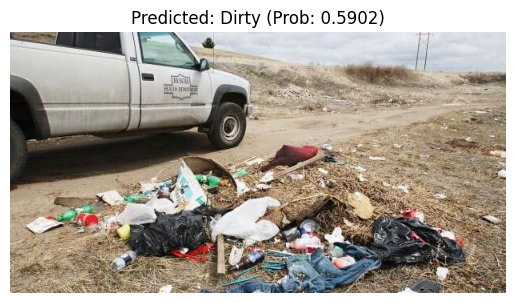

In [25]:
# New Image Path
new_image_paths = [
    '/content/685090abcb730.preview.jpg',
]

# Check if the model was loaded successfully before proceeding
if loaded_model is None:
    print("\nModel was not loaded successfully. Cannot perform inference.")
else:
    print("\nPerforming inference on new images:")
    for img_path in new_image_paths:
        print(f"\n--- Processing: {img_path} ---")

        # Check if the image file exists
        if not os.path.exists(img_path):
            print(f"Error: Image file not found at {img_path}. Skipping.")
            continue

        # Preprocess the image
        preprocessed_img = preprocess_image(img_path, IMG_HEIGHT, IMG_WIDTH)

        if preprocessed_img is not None:
            # Perform prediction
            predicted_label, prediction_prob = predict_image_class(loaded_model, preprocessed_img, loaded_class_names)

            # Display the image and prediction result
            try:
                img_display = Image.open(img_path)
                plt.imshow(img_display)
                plt.title(f"Predicted: {predicted_label} (Prob: {prediction_prob:.4f})")
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"Could not display image {img_path}: {e}")
        else:
            print(f"Inference failed for {img_path} due to preprocessing error.")